## Predict the Success of Bank Telemarketing

In [12]:
import pandas as pd

In [13]:
bank_data = pd.read_excel("bank-additional.xlsx")

In [14]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Exploratory Data Analysis

In [16]:
import matplotlib.pyplot as plt

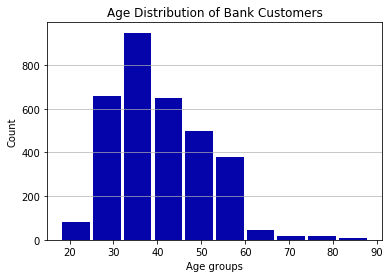

In [35]:
X_train['age'].plot.hist(grid=False, bins=10, rwidth=0.9,
                   color='#0504aa')
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.85)

We see that the highest number of the target customers belong to mid 30s.<br>
Next highest were customers in their late 20s to early 30s and early to mid 40s.<br>
Followed by customers in their 50s.

In [46]:
y_train.value_counts()

no     2939
yes     356
Name: y, dtype: int64

This shows that close to <b>89% of the customers did not subscribe</b> to the term loan

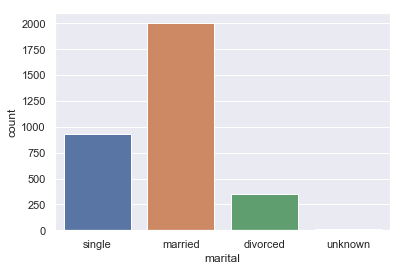

In [50]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="marital", data=X_train)

This correlates with the age distribution graph which shows that majority of the targetted customers were in their 30s. This is certainly the age where is it generally presumed that the customer would be married.

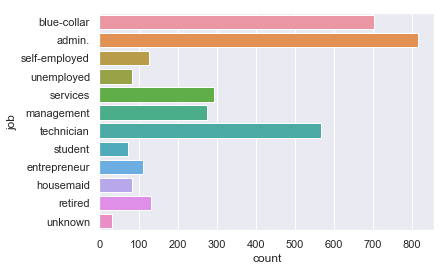

In [58]:
bx = sns.countplot(y="job", data=X_train)

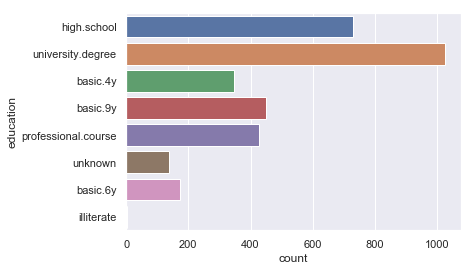

In [60]:
cx = sns.countplot(y="education", data=X_train)

In [95]:
X_train['age'].value_counts()[:10]

32    179
31    150
35    143
30    140
33    134
34    133
36    131
41    117
38    114
37    114
Name: age, dtype: int64

In [99]:
X_train['education'].value_counts()[:10]

X_train['job'].value_counts()[:12]

admin.           816
blue-collar      703
technician       568
services         294
management       274
retired          131
self-employed    127
entrepreneur     111
housemaid         84
unemployed        83
student           72
unknown           32
Name: job, dtype: int64

In [132]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


Our dataset has 11 objects i.e. categorical variables. 'y' is our target variable so leaving that aside, we will need to conduct one-hot encoding for the remaining categorical variables

### One Hot Encoding

In [112]:
bank_data_encoded = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [113]:
bank_data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [114]:
bank_data_encoded['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

Let's convert our target variable into numerical type as well.

In [115]:
%timeit
#Replaces 'yes' with 1, 'no' with 0 for the df column specified.
bank_data_encoded['y'] = bank_data_encoded['y'].apply(lambda x: 0 if x=='no' else 1)

bank_data_encoded['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

Now that we've transformed the data, it is time to dive into analysis.

The first step is to separate our target from our predictors.

In [119]:
 #grouping the predictors by dropping y
y = bank_data_encoded['y']
X = bank_data_encoded.drop(['y'], axis = 1)

In [120]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

We see that our dataset after transformation is high dimensional in nature. Not all features however, contribute to the prediction variable. Therefore, we remove features of low importance to improve accuracy, and reduce both model complexity and overfitting. 

For this reason, we will use Recursive Feature Elimination or RFE.

### Recursive Feature Elimination

Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class).

In [121]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [124]:
svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 20)
rfe = rfe.fit(X, y)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False  True False  True False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False  True  True
 False False False False False False False  True  True False False  True
 False  True  True  True False  True  True False False False False False
  True  True  True]
[20 24 15 23  1  1 10  3  1 25  1 16 13 38 14  1 27 36  5  1  1 41  4 18
 21 40 19  6 17 30 43 33 22 26  1  1 44 28 35 39 11 34 42  1  1  7  2  1
  8  1  1  1  9  1  1 32 12 37 29 31  1  1  1]


From this we understand that the features with rank 1 are the highest ranked ones and therefore of most relevance.<br>
They are:<br>
'previous', 'emp.var.rate', 'euribor3m', 'job_admin.', 'job_retired', 'job_technician', 'job_unemployed', 'default_no', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'

In [126]:
X_rfe = X[['previous', 'emp.var.rate', 'euribor3m', 'job_admin.', 'job_retired', 'job_technician', 'job_unemployed', 'default_no', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']]

In [127]:
y_rfe = y.copy()

#### Splitting the data

Now, let's split the data into train and test.

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size = 0.20)

In [129]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel='linear',C=0.1)  #default c is 1, change to 0.1. 
#As c decreases, it finds a hyperplane with higher margin, but lower accuracy/higher missclassification
#Note: As c increases there is higher penalty for missclassification
svclassifier.fit(X_train, y_train) 

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Since our problem is binary classification problem, we resort to confusion matrix to measure the effectiveness of our model.

### Confusion Matrix

In [131]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[735   6]
 [ 66  17]]
             precision    recall  f1-score   support

          0       0.92      0.99      0.95       741
          1       0.74      0.20      0.32        83

avg / total       0.90      0.91      0.89       824



A f1-score of 0.89 suggests that our model has faired decently well.